<img align="center" src="https://raw.githubusercontent.com/FUlyankin/Parsers/master/images%20/cats.jpg" height="1200" width="1200"> 

# Мини-домашка 5: визуализация

У всех нас есть датасет по контакту. В нём лежит информация про всех нас. Эту информацию надо как следует проанализировать. Именно этим мы сейчас продолжим заниматься. В этот раз с картинками! 

Для начала подгрузите все необходимые библиотеки: `pandas`, `matplotlib.pyplot`, `seaborn` и включите опцию, отвечающую за прорисовку картинок прямо в питонячей тетрадке.

In [61]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Подгрузите данные и посмотрите на первые 5 строк. Назовите табличку `df`. Иначе код ниже не будет работать. 

In [62]:
df = pd.read_csv('../data/vk_main.csv', sep='\t')
df.head()

,city,country,first_name,home_town,last_name,likes_memes,uid,male_dummy,facebook_dummy,instagram_dummy,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
0,Москва,Россия,Артём,MOSCOW,Еркин,0,181029517,1,0,0,...,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,16.0,0.375000
1,NaN,Россия,Армен,NaN,Хачатрян,15,73703994,1,0,1,...,1.750000,4.0,1.0,0.571429,1.0,0.0,0.0,0.0,47.0,0.531915
2,Москва,Россия,Abbos,Бекабад,Akhmedov,11,467673028,1,0,0,...,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,26.0,0.500000
3,Москва,Россия,Адам,NaN,Триандафилиди,0,144910934,1,0,1,...,1.428571,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,83.0,0.518072
4,Алматы,Казахстан,Айжан,NaN,Саят,9,166045266,0,0,0,...,1.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,29.0,0.344828


Давайте посмотрим на все названия колонок, которые есть в таблице. 

In [63]:
df.columns

Index(['city', 'country', 'first_name', 'home_town', 'last_name',
       'likes_memes', 'uid', 'male_dummy', 'facebook_dummy', 'instagram_dummy',
       'skype_dummy', 'twitter_dummy', 'home_phone_dummy',
       'mobile_phone_dummy', 'site_dummy', 'can_post_dummy',
       'can_see_all_posts_dummy', 'can_see_audio_dummy',
       'can_write_private_message_dummy', 'has_mobile_dummy', 'has_ava_dummy',
       'wall_comments_dummy', 'english_dummy', 'folowers_cnt', 'albums_cnt',
       'audio_cnt', 'followers_cnt', 'friends_cnt', 'gifts_cnt', 'groups_cnt',
       'notes_cnt', 'photos_cnt', 'subscriptions_cnt', 'user_photos_cnt',
       'videos_cnt', 'pages_cnt', 'lang_cnt', 'change_city_school_cnt',
       'schools_cnt', 'relation_cat', 'alco_love_cat', 'smoke_love_cat',
       'life_main_cat', 'people_main_cat', 'political_cat',
       'private_prof_dummy', 'wall_can_comment_dummy', 'wall_comment_cnt',
       'wall_comment_max', 'wall_comment_mean', 'wall_comment_median',
       'wall_emoj

Мы видим, что часть из них кончается на `cnt`. Это колонки-счётчики. В них лежат такие переменные как количество фоток, друзей, записей на стене и тд. Давайте вытащим все такие названия из таблички с помощью цикла. 

In [64]:
variables_cnt = [item for item in df.columns if item[-3:] == 'cnt']
variables_cnt

['folowers_cnt',
 'albums_cnt',
 'audio_cnt',
 'followers_cnt',
 'friends_cnt',
 'gifts_cnt',
 'groups_cnt',
 'notes_cnt',
 'photos_cnt',
 'subscriptions_cnt',
 'user_photos_cnt',
 'videos_cnt',
 'pages_cnt',
 'lang_cnt',
 'change_city_school_cnt',
 'schools_cnt',
 'wall_comment_cnt',
 'wall_emoji_cnt',
 'wall_like_cnt',
 'wall_post_android_cnt',
 'wall_post_cnt',
 'wall_post_instagram_cnt',
 'wall_post_ipad_cnt',
 'wall_post_iphone_cnt',
 'wall_post_original_cnt',
 'wall_post_other_cnt',
 'wall_post_reply_cnt',
 'wall_post_wphone_cnt',
 'wall_repost_cnt',
 'wall_repost_group_cnt',
 'wall_repost_user_cnt',
 'wall_text_len_cnt',
 'photo_like_cnt',
 'photo_repost_cnt',
 'photo_text_len_cnt',
 'photo_ava_change_cnt',
 'photo_text_url_len_cnt',
 'friends_from_course_cnt']

Разбиритесь как работает и устроен этот цикл, если вы ещё не разбираетесь. Почитать об этом можно [вот тут.](https://habr.com/ru/post/30232/) Чуть ниже вам предстоит написать свой такой. 

__[2]__ Вытащите из переменных счётчиков только те, которые отвечают за фото. Постройте для них гистограммы. Как думаете, в каких переменных есть выбросы? Какие из переменных неинформативны? Почему?

__Ответ:__ Выбросы есть везде, где длинные хвосты. То есть это почти каждая переменная. Неинформативная `photo_ava_change_cnt`. Она принимает только одно значение. Какой вообще в ней смысл?!

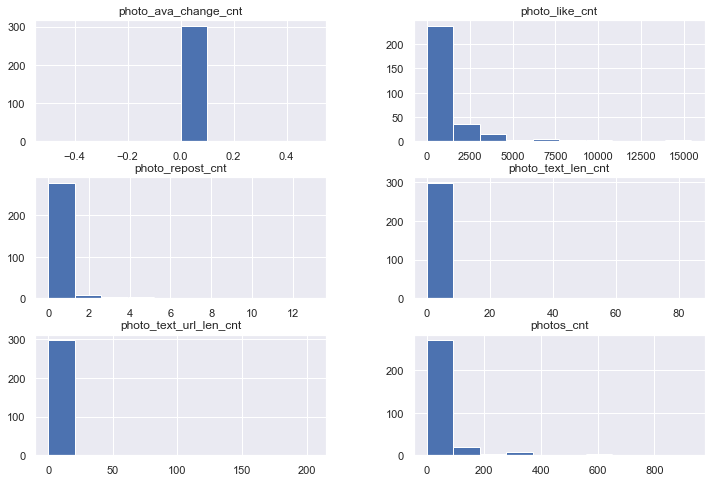

In [65]:
photo_vars = [item for item in variables_cnt if item[:5] == 'photo']
df[photo_vars].hist(figsize = (12,8));

Давайте вытащим из нашего большого датасета несколько интересных переменных. Это будет: число друзей с курса, число друзей, число подписчиков, число лайков на стене, количество символов (букв и тп) на стене, процент друзей девушек с курса, число лайков в паблике с мемами, пол. Переменная, отвечающая за пол, принимает значение $1$, если объект из выборки мужчина. 

In [66]:
vars_interesting = ['friends_from_course_cnt', 'friends_cnt', 'folowers_cnt', 'wall_like_cnt', 
                    'wall_text_len_cnt', 'friends_mail_from_course_pct', 'likes_memes', 'male_dummy']

__[1]__ Визуализируйте вытащенные признаки попарно. Постройте `pairplot` для всех пар. На диагонали расположите оценки плотностей для признаков. Для этого используйте опцию `diag_kind = 'kde'`. С помощью параметра `hue` разбейте все наблюдения на мужские и женские, чтобы они отражались на картинках разными цветами.

/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


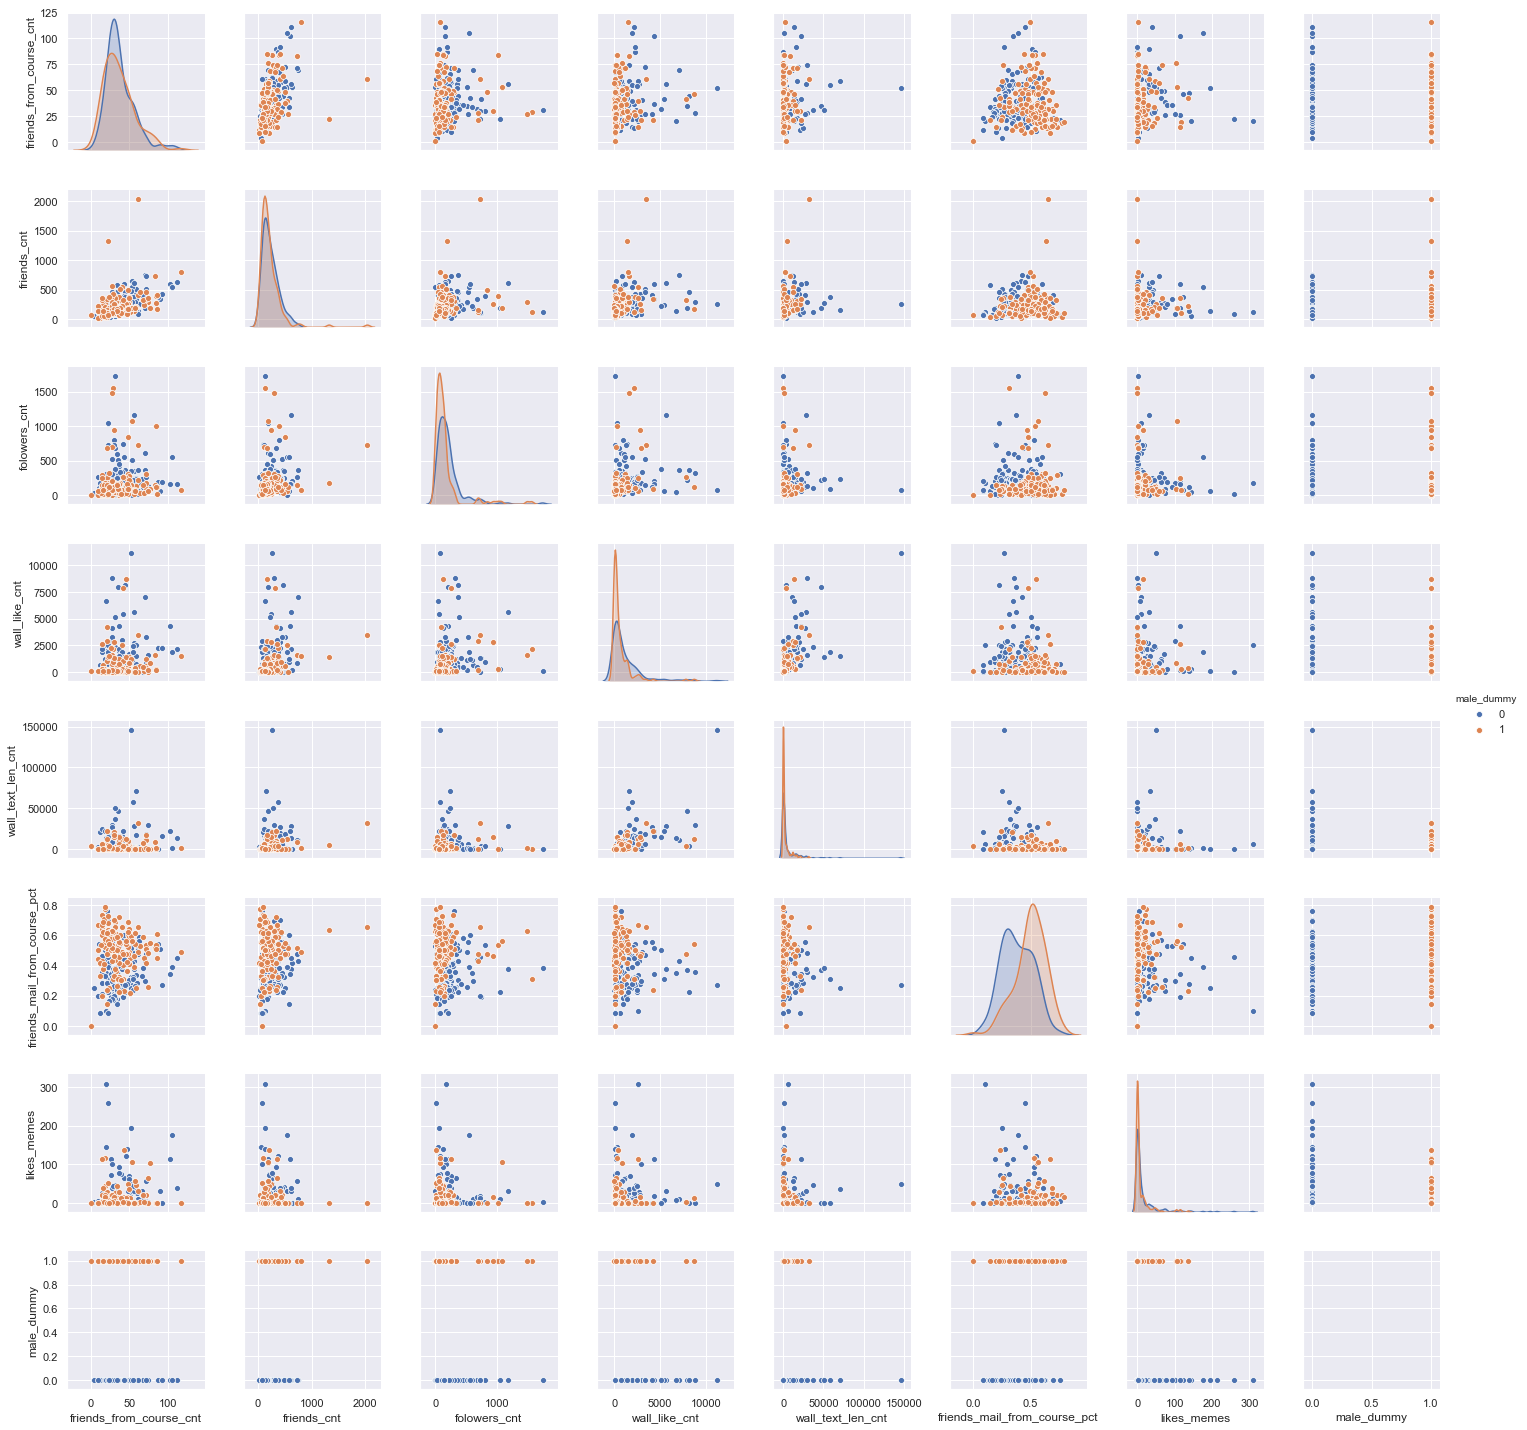

In [67]:
sns.pairplot(df[vars_interesting], diag_kind="kde", hue='male_dummy');

__[2]__ Дайте ответы на соедущие вопросы. Свои мысли пишите прямо здесь! 

* Между какими признаками скорее всего есть линейная зависимость (чем больше один, тем в среднем больше второй, либо наоборот чем больше один, тем меньше другой)? Почему вы так решили? 

__Ответ:__ ну, например `friends_from_course_cnt` и `friends_cnt`. Потому что облако точек, соотвествующее их пересечение вытянуто по диагонали. __Подойдут все подобные ответы, пытающиеся проанализировать облака рассеивания.__


* Есть ли объекты-выбросы, которые наблюдаются далеко от сгустков из точек. 

__Ответ:__ Да есть. __Подойдут любые попытки рассказать о том, что в некоторых облаках точки далеко от основного сгустка.__ 

* Посмотрите не гистограмму, соответсвующую переменной `friends_mail_from_course_pct` (доля друзей парней с курса). Какую интересную особенность вы видите на ней? Почему так произошло? 

__Ответ:__ Смотрим на плотность распределения для этой переменной. Она явно разваливается на две. Прям чётко видно. При этом парней друзей с курса больше у парней. Браство типо. 

* Какие ещё интересные особенности вы видите на картинке?

__Ответ:__ Покажите, что они тут пишут. Прям интересно. Лал. 

__[1]__ Отлично! Половина домашки осталась позади. Давайте теперь для тех же самых признаков построим матрицу корреляций и провизуализируем её с помощью `heatmap`.

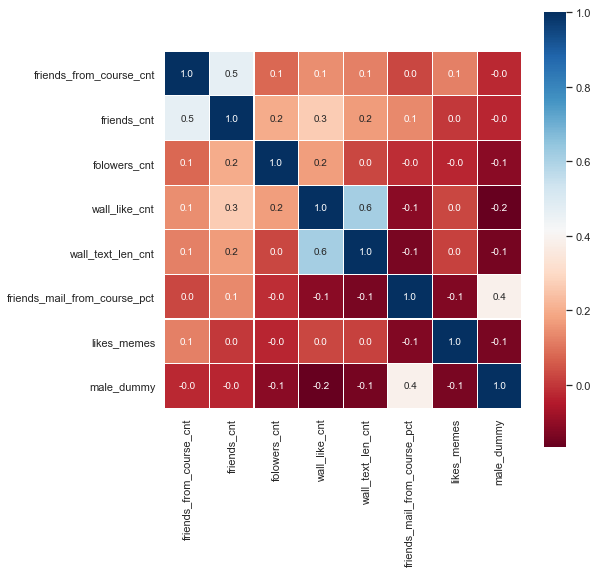

In [68]:
plt.subplots(figsize=(8, 8))
sns.heatmap(df[vars_interesting].corr( ), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

__[2]__ Между какими переменными корреляция самая высокая? Почему? Она отрицательная или положительная. Прокомментируйте все клетки, где она оказалась $\ge 0.3$ либо $\le -0.2$. 

__Ответ:__ 

__[1]__ Дамми-переменная это переменная, которая принмает два значения. Либо $1$, если человек обладает закодированным в ней свойством, либо $0$, если не обладает. В нашей таблице все дамми-переменные оканчиваются на суффикc `dummy`.  

Возьмите переменную `instagram_dummy`. Она принимает значение $1$, если у пользователя на страничке есть ссылка на инстаграм. Возьмите переменную `male_dummy`. Она примает значение $1$, если пользователь парень. Постройте картинку, на которой будет видно как между собой соотносятся владельцы инстаграмма по полу. (мы строили такую картинку на паре для распределения жанров музыки по годам).

In [69]:
dff = df.pivot_table(index='instagram_dummy', columns='male_dummy', values='first_name', aggfunc='count')
dff

male_dummy,0,1
instagram_dummy,,
0,146,129
1,39,21


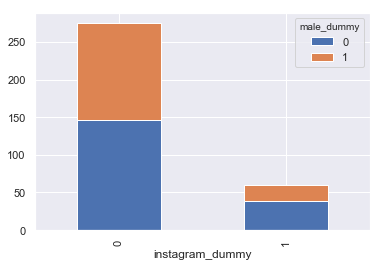

In [70]:
dff.plot(kind='bar', stacked=True)

Правда ли, что девушки чаще указыают наличие инстаграмма на своей страничке?

__Ответ:__  Да. Во втором столбике синяя фигня толще. 

__[1]__  Категориальная переменная обычно принимает значения из какого-то фиксированного множества. Например, переменная `political_cat` описывает к какой категории относятся политические взгляды юзера. Постройте для этой переменной столбиковую диаграмму. Разбиритесь по [документации](http://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) как сделать у столбиков горизонтальное расположение. Можно ли сделать исходя из картинки вывод, что в вышке одни либералы? Почему? 

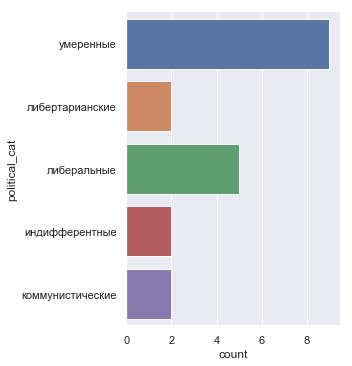

In [87]:
sns.catplot(y = 'political_cat', data=df, kind='count');

__[n]  Удиви нас. Попробуй найти в данных какую-то классную особенность и визуализируйте её. Если у тебя это получится, мы поставим дополнительные баллы.__ Если вы найдёте полную фигню (сколько всего друзей у Маши или типа того), баллов не будет. Найденный факт реально должен выносить мозг и сносить крышу.

In [ ]:
# Ну как-то так... 

Фидбэк по домашке, свои нюни и драгоценные слёзки нужно оставить в [анонимном опроснике.](https://docs.google.com/forms/d/e/1FAIpQLSeQRtu8Xo5g6jDJ3zxgpfMuPa5cgi3igrne40_vqVZwYnDAZA/viewform)